In [2]:
import networkx as nx
%matplotlib inline

Outline:
* plotting nodes/edges
* graph layouts
* colors
* plotting with edge/node attributes

# Plotting nodes and edges

In [3]:
G = nx.Graph()                               #create a graph
G.add_nodes_from([0,1,2,3])                  #add some nodes
G.add_edges_from([(0,1),(1,2),(2,3),(3,0)])  #add some edges
pos = {0:[1,1],1:[1,2],2:[2,3],3:[3,2]}      #dictionary of positions
       

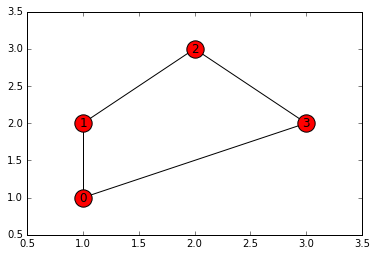

In [4]:
nx.draw_networkx(G,pos)     #plot edges as lines, nodes as dots + labels

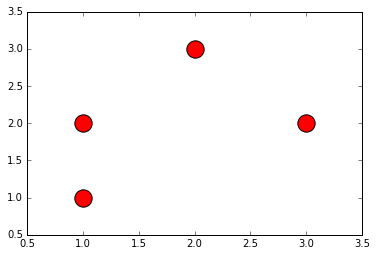

In [5]:
nx.draw_networkx_nodes(G,pos)     #plot only the nodes 

In [ ]:
nx.draw_networkx_edges(G,pos)    #plot only the edges

# Graph layouts

Creating a position-dictionary each time is tedious.
Sometimes graphs don't even have a geometry to use.
Thankfully NetworkX provides us with some standard layouts to plot graphs.
* circular_layout - positions nodes on a circle
* random_layout - chooses random but uniform positions in a unit square
* shell_layout - positions nodes in concentric circles
* spring_layout - few crossings, edges of more or less equal length
* spectral_layout - uses eigenvectors of the graphs laplacian as coordinates

In [ ]:
#random graph with edge probability of 0.3
G = nx.gnp_random_graph(20,0.3)   

In [ ]:
pos_circular = nx.circular_layout(G)
nx.draw_networkx(G,pos_circular)

In [ ]:
pos_random = nx.random_layout(G)
nx.draw(G,pos_random)

In [ ]:
pos_shell = nx.shell_layout(G)
nx.draw(G,pos_shell)

In [ ]:
pos_spring = nx.spring_layout(G)
nx.draw(G,pos_spring)

In [ ]:
pos_spectral = nx.spectral_layout(G)
nx.draw(G,pos_spectral)

## Draw only specific nodes

Now we want to plot only the nodes [3,4,5,6] and all edges connected to them

In [ ]:
nodes = [3,4,5,6]
edges = [e for e in G.edges() if e[0] in nodes or e[1] in nodes]
nx.draw_networkx_nodes(G,pos_spring, nodelist=nodes)
nx.draw_networkx_edges(G,pos_spring,edgelist=edges)

# Colors

Nearly all of matplotlib's options for color, transparency etc. can be used via NetworkX's draw-functions:
* modify node size and shape via the keyword-arguments `node_size` and `node_shape`
* modify node color via `node_color` or providing a `cmap`
* modify edge width and style via `width` and `style`
* modify edge color via `edge_color` and `edge_cmap`
* modify transparency via `alpha`

### colorful example 

In [ ]:
import matplotlib.pyplot as plt
G = nx.gnp_random_graph(30,0.15)
pos = nx.circular_layout(G)
blues = plt.cm.Blues
reds = plt.cm.hot
nx.draw_networkx_nodes(G,pos,node_color=range(30),cmap=blues)
nx.draw_networkx_edges(G,pos,edge_color=range(len(G.edges())),edge_cmap=reds,width=3)

# Plotting with node/edge attributes

We can store attrobutes for nodes and edges by assigning vaules in the node/edge dictionaries, remember?

In [ ]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.node[1]['mood'] = 'happy'
G.node[2]['mood'] = 'sad'
G.node[3]['mood'] = 'bored'
G.node[4]['x'] = 2.0

In [ ]:
G.node[1]['mood']

In [ ]:
G.node[4]['mood']

In [6]:
G = nx.read_graphml("../data/visualization/medium_graph.xml")

In [7]:
G.nodes(data=True)

[('2300', {'conductivity': 10.0, 'x': 698.200012207, 'y': 781.599975586}),
 ('687', {'conductivity': 7.0, 'x': 416.5, 'y': 821.0}),
 ('4825', {'conductivity': 9.0, 'x': 826.299987793, 'y': 582.0}),
 ('3911', {'conductivity': 6.0, 'x': 1018.0, 'y': 1046.0}),
 ('4884', {'conductivity': 7.0, 'x': 915.0, 'y': 493.5}),
 ('5436', {'conductivity': 7.0, 'x': 1150.5, 'y': 438.5}),
 ('2327', {'conductivity': 6.0, 'x': 737.5, 'y': 722.0}),
 ('5495', {'conductivity': 7.0, 'x': 1035.0, 'y': 401.5}),
 ('732', {'conductivity': 6.0, 'x': 557.5, 'y': 1338.5}),
 ('4180', {'conductivity': 5.0, 'x': 1142.5, 'y': 913.0}),
 ('1648', {'conductivity': 6.0, 'x': 495.0, 'y': 684.5}),
 ('5504', {'conductivity': 6.0, 'x': 1053.0, 'y': 420.5}),
 ('4982', {'conductivity': 7.0, 'x': 819.0, 'y': 252.0}),
 ('1343', {'conductivity': 6.0, 'x': 681.5, 'y': 854.5}),
 ('5158', {'conductivity': 6.0, 'x': 993.5, 'y': 779.0}),
 ('773', {'conductivity': 7.0, 'x': 608.5, 'y': 1361.0}),
 ('4945', {'conductivity': 6.0, 'x': 854.0

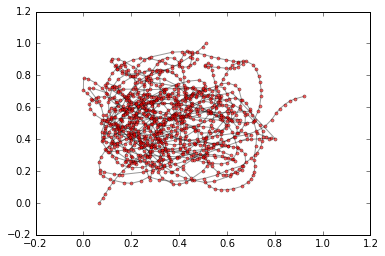

In [8]:
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G,pos,edgecolor="DarkSlateGray",alpha =0.4)
nx.draw_networkx_nodes(G,pos,color="FireBrick",alpha=0.6,node_size=10,linewidths=0.5)

In [9]:
pos = {}
for k in G.node.keys():
    pos[k] = (G.node[k]['x'],G.node[k]['y'])
print(pos)

{'4825': (826.299987793, 582.0), '3911': (1018.0, 1046.0), '4819': (832.0, 589.0), '5436': (1150.5, 438.5), '2327': (737.5, 722.0), '5495': (1035.0, 401.5), '732': (557.5, 1338.5), '4180': (1142.5, 913.0), '1648': (495.0, 684.5), '1069': (569.0, 1136.5), '2239': (606.5, 624.75), '4982': (819.0, 252.0), '1343': (681.5, 854.5), '5158': (993.5, 779.0), '773': (608.5, 1361.0), '4945': (854.0, 446.5), '993': (712.0, 1274.0), '3280': (776.0, 933.0), '978': (656.5, 1254.0), '1231': (702.0, 961.0), '5516': (1037.0, 341.0), '2054': (489.0, 385.5), '4234': (1232.0, 927.5), '4710': (801.0, 471.5), '1442': (260.5, 727.5), '3269': (775.0, 953.5), '2138': (618.0, 753.5), '5674': (1213.5, 572.25), '2402': (739.5, 666.5), '860': (589.5, 1271.5), '4181': (1148.5, 915.5), '3235': (749.0, 975.75), '4356': (778.5, 743.0), '5634': (1170.0, 447.5), '1500': (270.0, 678.0), '1391': (720.0, 797.5), '4292': (759.5, 755.5), '4266': (778.0, 878.0), '5498': (1093.5, 427.0), '923': (735.5, 1398.0), '3770': (1119.0,

In [12]:
import matplotlib.pyplot as plt

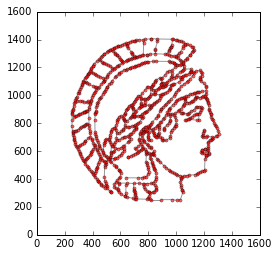

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
nx.draw_networkx_edges(G,pos,edgecolor="DarkSlateGray",alpha=0.4)
nx.draw_networkx_nodes(G,pos,color="FireBrick",alpha=0.6,node_size=10,linewidths=0.5)